In [4]:
import cv2
import numpy as np

In [6]:
from matplotlib import pyplot as plt

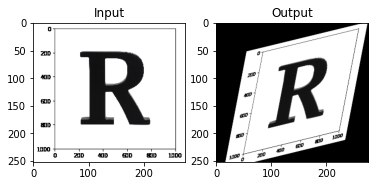

In [7]:
img = cv2.imread('LetterR_opencv.png')
rows,cols,ch = img.shape
pts1 = np.float32([[40,10],[257,10],[40,288]])
pts2 = np.float32([[85,52],[257,10],[40,288]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [9]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_MOUSEMOVE:
        mousex = x
        mousey = y
        cv2.circle(img,(x,y),5,(0,255,0),2)

# Create a black image, a window and bind the function to window
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
t = 0
while(1):
    t+=1
    M = cv2.getRotationMatrix2D((cols/2,rows/2),t%360,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow('image',dst)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()